In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from math import sqrt
import random
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
train=pd.read_csv(r'train_cut.csv')
to_test=pd.read_csv(r'test.csv')

x_train = train
x_train['Date'] = pd.to_datetime(x_train['Date'], errors='coerce')
x_train.head()
test = train['n_Procedure']

In [23]:
print(x_train)

          Date Procedure  n_Procedure  Temperature  EventTarget
0   2015-12-11         A            1           27            1
1   2015-12-11         B            1           27            1
2   2015-12-11         C            0           27            1
3   2015-12-12         A            3           21            0
4   2015-12-12         B            2           21            0
..         ...       ...          ...          ...          ...
883 2016-10-30         B            9           32            0
884 2016-10-30         C            0           32            0
885 2016-10-31         A            5           34            0
886 2016-10-31         B            4           34            0
887 2016-10-31         C            3           34            0

[888 rows x 5 columns]


In [5]:
x_a2 = []
y_a2 = []
x_b2 = []
y_b2 = []
x_c2 = []
y_c2 = []
for i in range(len(test)):
    if(x_train['Procedure'][i] == 'A'):
        x_a2.append([x_train['Date'][i],x_train['Temperature'][i],x_train['EventTarget'][i],x_train['Season'][i],x_train['Weekend'][i]])
        y_a2.append(test[i])
    elif(train['Procedure'][i] == 'B'):
        x_b2.append([x_train['Date'][i],x_train['Temperature'][i],x_train['EventTarget'][i],x_train['Season'][i],x_train['Weekend'][i]])
        y_b2.append(test[i])
    elif(train['Procedure'][i] == 'C'):
        x_c2.append([x_train['Date'][i],x_train['Temperature'][i],x_train['EventTarget'][i],x_train['Season'][i],x_train['Weekend'][i]])
        y_c2.append(test[i])

KeyError: 'Season'

In [6]:
x_a = []
y_a = []
x_b = []
y_b = []
x_c = []
y_c = []
for i in range(len(test)):
    if(x_train['Procedure'][i] == 'A'):
        x_a.append([x_train['Temperature'][i],x_train['EventTarget'][i],x_train['Season'][i],x_train['Weekend'][i]])
        y_a.append(test[i])
    elif(train['Procedure'][i] == 'B'):
        x_b.append([x_train['Temperature'][i],x_train['EventTarget'][i],x_train['Season'][i],x_train['Weekend'][i]])
        y_b.append(test[i])
    elif(train['Procedure'][i] == 'C'):
        x_c.append([x_train['Temperature'][i],x_train['EventTarget'][i],x_train['Season'][i],x_train['Weekend'][i]])
        y_c.append(test[i])

KeyError: 'Season'

In [2]:
x_a = []
y_a = []
x_b = []
y_b = []
x_c = []
y_c = []
for i in range(len(test)):
    if(x_train['Procedure'][i] == 'A'):
        x_a.append([x_train['Temperature'][i],x_train['EventTarget'][i]])
        y_a.append(test[i])
    elif(train['Procedure'][i] == 'B'):
        x_b.append([x_train['Temperature'][i],x_train['EventTarget'][i]])
        y_b.append(test[i])
    elif(train['Procedure'][i] == 'C'):
        x_c.append([x_train['Temperature'][i],x_train['EventTarget'][i]])
        y_c.append(test[i])

(array([ 0.,  2., 10., 21., 30., 31., 36., 24., 13., 10.,  5.,  3.,  1.]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]), <a list of 13 Patch objects>)


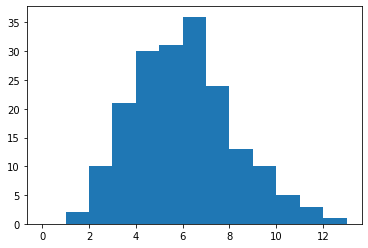

(array([0., 3., 1., 1., 7., 5., 2., 5., 1., 2., 0., 0., 0.]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]), <a list of 13 Patch objects>)


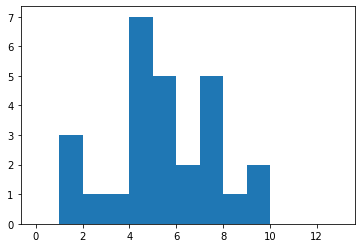

(array([ 1.,  0.,  6., 10., 11., 20.,  7., 15.,  6.,  2.,  3.,  1.,  1.]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]), <a list of 13 Patch objects>)


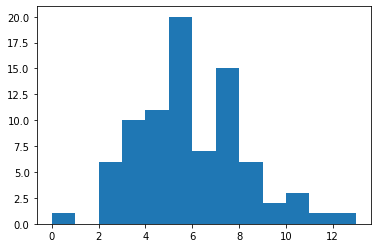

In [28]:
xa0 = []
xa1 = []
xa2 = []

for i in range(len(x_a)):
    if(x_a[i][1] == 0):
        xa0.append(y_a[i])
    elif(x_a[i][1] == 1):
        xa1.append(y_a[i])
    elif(x_a[i][1] == 2):
        xa2.append(y_a[i])
    
print(plt.hist(xa0,bins=range(14)))
plt.show()
print(plt.hist(xa1,bins=range(14)))
plt.show()
print(plt.hist(xa2,bins=range(14)))
plt.show()

In [18]:
q = []
w = []
q1 = []
q2 = []
q3 = []
w1 = []
w2 = []
w3 = []
for i in range(len(x_b)):
    print(x_b[i],y_b[i])
    if(x_b[i][1] == 0):
        q1.append(x_b[i][0])
        w1.append(y_b[i])
    elif(x_b[i][1] == 1):
        q2.append(x_b[i][0])
        w2.append(y_b[i])
    elif(x_b[i][1] == 2):
        q3.append(x_b[i][0])
        w3.append(y_b[i])
    q.append(x_b[i][0])
    w.append(x_b[i][1])

[27, 1] 1
[21, 0] 2
[20, 1] 2
[27, 0] 2
[22, 0] 3
[23, 0] 1
[24, 2] 0
[20, 2] 1
[25, 2] 0
[25, 2] 4
[25, 2] 1
[21, 2] 4
[26, 2] 4
[23, 0] 7
[28, 0] 3
[19, 0] 3
[20, 0] 3
[24, 0] 2
[24, 0] 5
[27, 0] 5
[30, 0] 4
[19, 0] 2
[19, 0] 2
[19, 0] 5
[20, 0] 4
[23, 0] 2
[23, 0] 5
[24, 0] 2
[25, 0] 2
[28, 0] 3
[21, 0] 4
[23, 0] 2
[19, 1] 1
[22, 2] 2
[21, 2] 3
[19, 0] 1
[21, 0] 4
[21, 0] 3
[21, 0] 1
[28, 2] 2
[21, 2] 2
[20, 2] 2
[25, 0] 5
[20, 0] 0
[29, 0] 2
[29, 0] 1
[21, 0] 2
[26, 2] 2
[20, 2] 3
[20, 2] 4
[17, 2] 3
[18, 0] 0
[18, 0] 3
[22, 0] 0
[21, 2] 3
[19, 2] 2
[27, 2] 2
[26, 2] 1
[26, 1] 1
[28, 1] 4
[23, 2] 1
[22, 2] 2
[23, 2] 4
[21, 0] 3
[19, 0] 3
[24, 0] 4
[24, 0] 3
[23, 2] 6
[24, 2] 1
[25, 2] 5
[25, 2] 7
[20, 2] 3
[29, 0] 4
[33, 0] 2
[33, 0] 1
[33, 2] 1
[22, 2] 2
[26, 2] 2
[24, 2] 4
[33, 0] 0
[23, 0] 0
[26, 0] 5
[27, 0] 2
[28, 0] 0
[23, 0] 3
[25, 2] 3
[32, 2] 5
[26, 2] 2
[27, 0] 4
[24, 2] 2
[27, 2] 0
[23, 2] 4
[33, 2] 5
[34, 2] 1
[31, 1] 7
[26, 0] 3
[31, 2] 4
[29, 2] 1
[24, 2] 7
[26, 0] 3


In [29]:
plt.plot(q3,w3)

NameError: name 'q3' is not defined

In [8]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(n_estimators=100, random_state=0)
regr.fit(x_a, y_a)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=0)

In [9]:
y_pred = regr.predict(x_a)

In [ ]:
r = (np.sqrt())

In [42]:
scaler = StandardScaler()
x_a=scaler.fit_transform(x_a)
# X_test=scaler.transform(X_test)

In [25]:
X = []
Y = []
y_act = []
prev = 20
for i in range(prev):
    X.append(x_a[i])
    Y.append(y_a[i])
for i in range(prev,len(y_a)):
    y_act.append(y_a[i])

In [26]:
# from sklearn.tree import DecisionTreeRegressor
# reg = DecisionTreeRegressor(random_state = 0)
# reg.fit(X,Y)
clf = SVR(C = 100)
clf.fit(X, Y)
# y_pred = clf.predict(X)
# y_pred = reg.predict(X)
# from sklearn.neighbors import KNeighborsRegressor
# neigh = KNeighborsRegressor(n_neighbors=5)
# neigh.fit(X, Y)
y_pred = []
for i in range(prev,len(x_a)):
#     y_pred = np.append(y_pred, clf.predict([x_a[i]]))
#     y_pred = np.append(y_pred, reg.predict([x_a[i]]))
    y_pred.append(clf.predict([x_a[i]]))
    del X[0]
    X.append(x_a[i])
    del Y[0]
    Y.append(clf.predict([x_a[i]]))
#     Y.append(y_a[i])
    clf.fit(X,Y)
#     reg.fit(X,Y)
#     neigh.fit(X,Y)
    
#     print(y_pred)

/home/shobhit/Documents/interiit/env/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shobhit/Documents/interiit/env/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shobhit/Documents/interiit/env/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shobhit/Documents/interiit/env/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y 

In [27]:
y_pred = np.round(y_pred)
print(y_pred)
print(y_act)

[[4.]
 [5.]
 [5.]
 [5.]
 [5.]
 [6.]
 [6.]
 [6.]
 [6.]
 [5.]
 [5.]
 [6.]
 [4.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [6.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [3.]
 [4.]
 [4.]
 [6.]
 [5.]
 [4.]
 [5.]
 [5.]
 [6.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [6.]
 [6.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [4.]
 [4.]
 [4.]
 [5.]
 [5.]
 [5.]
 [4.]
 [6.]
 [6.]
 [6.]
 [5.]
 [6.]
 [5.]
 [4.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [4.]
 [3.]
 [4.]
 [6.]
 [4.]
 [5.]
 [5.]
 [6.]
 [6.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [4.]
 [4.]
 [3.]
 [3.]
 [3.]
 [5.]
 [5.]
 [5.]
 [6.]
 [6.]
 [5.]
 [4.]
 [5.]
 [5.]
 [5.]
 [5.]
 [3.]
 [3.]
 [5.]
 [4.]
 [4.]
 [5.]
 [5.]
 [5.]
 [5.]
 [4.]
 [4.]
 [5.]
 [4.]
 [5.]
 [3.]
 [3.]
 [5.]
 [2.]
 [4.]
 [5.]
 [4.]
 [4.]
 [3.]
 [4.]
 [3.]
 [2.]
 [2.]
 [3.]
 [3.]
 [4.]
 [4.]
 [2.]
 [3.]
 [4.]
 [3.]
 [2.]
 [2.]
 [4.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [4.]
 [3.]
 [4.]
 [4.]
 [4.]
 [2.]
 [2.]
 [2.]
 [4.]
 [4.]
 [3.]
 [4.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [2.]
 [2.]
 [2.]
 [3.]
 [4.

In [28]:
print(np.exp(-sqrt(mean_squared_error(y_act,y_pred))))
print(sqrt(mean_squared_error(y_act,y_pred)))

0.04924980134384722
3.010849944999642


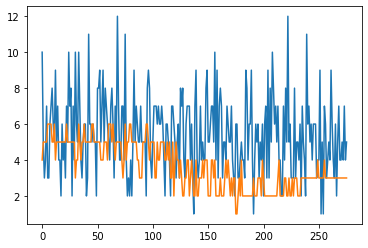

In [29]:
plt.plot(y_act)
plt.plot(y_pred)
plt.show()

In [ ]:
from xgboost import XGBRegressort
model = XGBRegressor(seed=model_seed,
                         n_estimators=n_estimators,
                         max_depth=max_depth,
                         learning_rate=learning_rate,
                         min_child_weight=min_child_weight,
                         subsample=subsample,
                         colsample_bytree=colsample_bytree,
                         colsample_bylevel=colsample_bylevel,
                         gamma=gamma)